# Lead Scoring Case Study - Predicting Hot Leads for X Education

### Step 1: importing necessary libraries

In [175]:
#Suppresssing warnings
import warnings
warnings.filterwarnings('ignore')
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#importing dataset to csv



In [176]:
leads_df=pd.read_csv("Leads.csv")

### step 2: Reading and understanding the data

In [177]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [178]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [179]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0

True

In [180]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Lead Number')) == 0

True

In [181]:
#dropping Lead Number and Prospect ID since they have all unique values and of no relevance

leads_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [182]:
#Checking for count of missing values in the data frame
leads_df.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [183]:
#checking percentage of null values in the data frame

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Step 3: Data Cleaning

In [184]:
#Drop all the columns with more than 35% missing values
cols=leads_df.columns

for i in cols:
    if((100*(leads_df[i].isnull().sum()/len(leads_df.index))) >= 35):
        leads_df.drop(i, 1, inplace = True)

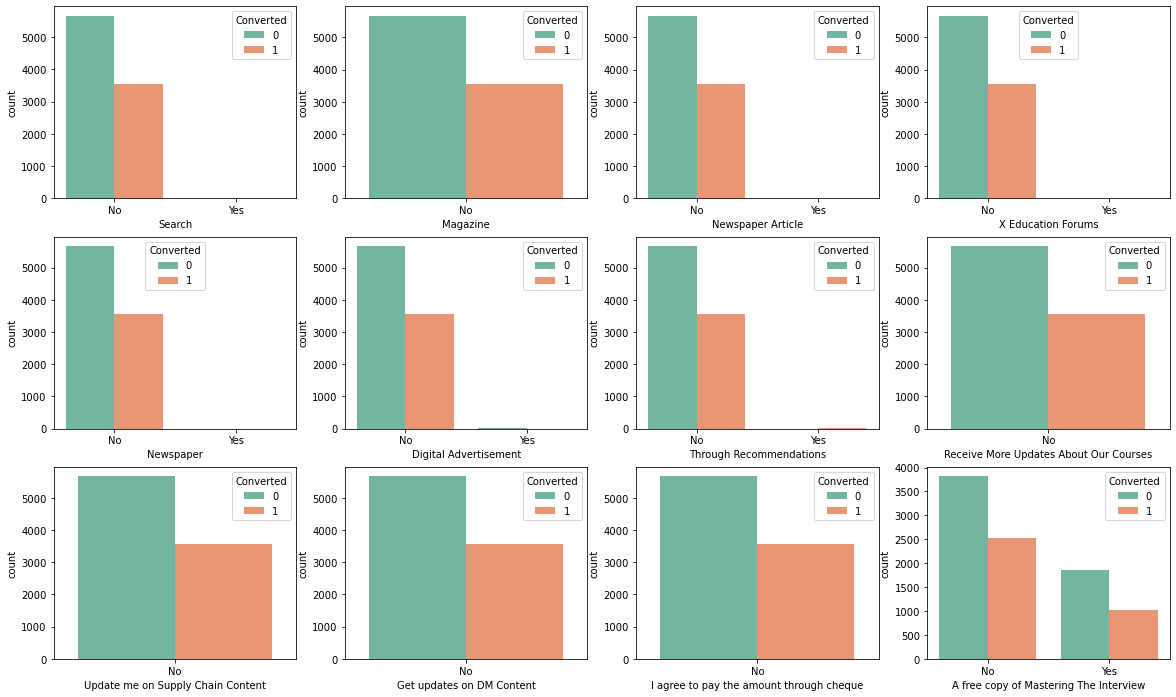

In [185]:
# Visualzing the categorical variables for imbalancing
fig, axs = plt.subplots(3,4,figsize = (20,12))
sns.countplot(x = "Search", hue = "Converted", data = leads_df, ax = axs[0,0],palette = 'Set2')
sns.countplot(x = "Magazine", hue = "Converted", data = leads_df, ax = axs[0,1],palette = 'Set2')
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df, ax = axs[0,2],palette = 'Set2')
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df, ax = axs[0,3],palette = 'Set2')
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df, ax = axs[1,0],palette = 'Set2')
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df, ax = axs[1,1],palette = 'Set2')
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df, ax = axs[1,2],palette = 'Set2')
sns.countplot(x = "Receive More Updates About Our Courses", hue = "Converted", data = leads_df, ax = axs[1,3],palette = 'Set2')
sns.countplot(x = "Update me on Supply Chain Content", hue = "Converted", data =leads_df, ax = axs[2,0],palette = 'Set2')
sns.countplot(x = "Get updates on DM Content", hue = "Converted", data = leads_df, ax = axs[2,1],palette = 'Set2')
sns.countplot(x = "I agree to pay the amount through cheque", hue = "Converted", data = leads_df, ax = axs[2,2],palette = 'Set2')
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df, ax = axs[2,3],palette = 'Set2')
plt.show()

In [186]:
#creating a list of columns to be dropped

cols_to_drop=(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'])

Inference:
"A free copy of Mastering The Interview" is a redundant variable so we will include this also in list of dropping columns.

In [187]:
leads_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

## handling missing value

###### lead source:

In [188]:
# impute the mode for missing values in the categorical col lead source
leads_df["Lead Source"] =leads_df["Lead Source"].fillna(leads_df["Lead Source"].mode()[0])

In [189]:
leads_df["Lead Source"].value_counts()

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [190]:
#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')

In [191]:
#combining low frequency values to Others

leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Live Chat','Social Media'] ,'Others')

In [192]:
leads_df["Lead Source"].value_counts()

Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64

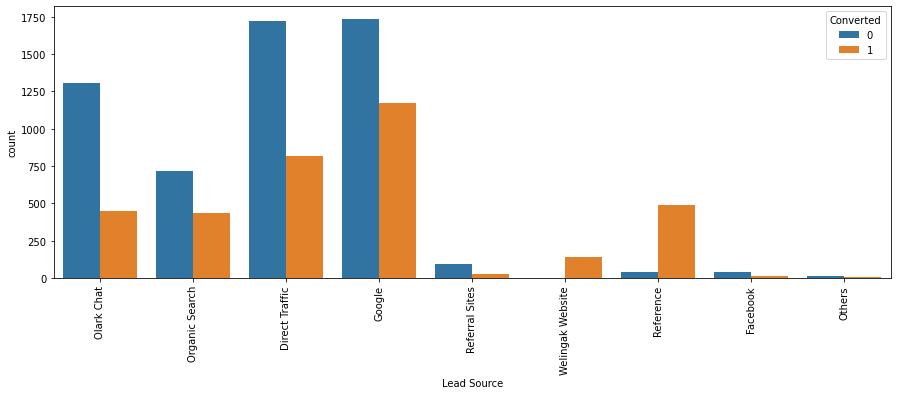

In [193]:
# Visualizing Lead source after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Source', hue='Converted' , data =leads_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

###### Inference:

Maximum Leads are generated by Google and Direct Traffic.
Conversion rate of Reference leads and Welinkgak Website leads is very high.

##### country

In [194]:
leads_df["Country"].value_counts(dropna = False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [195]:
#Imputing missing values in Country column with "unknown"
leads_df['Country'] = leads_df['Country'].replace(np.nan,'unknown')

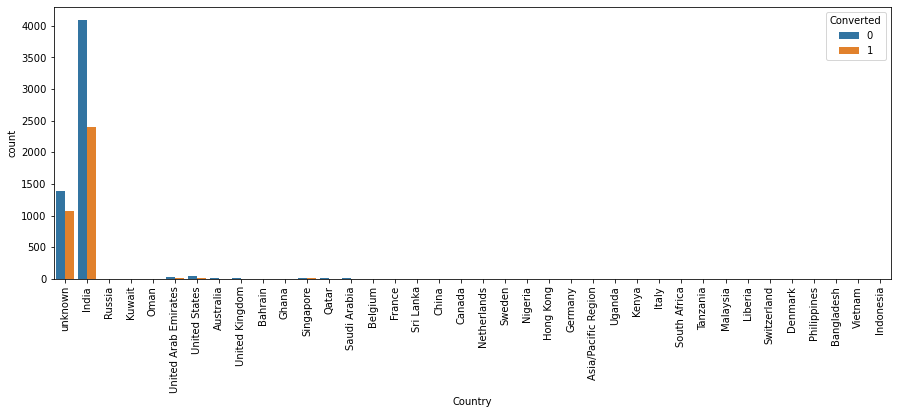

In [196]:
# Visualizing Country variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Country', hue='Converted' , data =leads_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### Inference:
As we can see that most of the data consists of value 'India', so it would be a redundant col


In [197]:
#creating a list of columns to be droppped

cols_to_drop.append('Country')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country']

###### What is your current occupation

In [198]:
#checking value counts of 'What is your current occupation' column
leads_df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

##### Creating another catergory for the values missing as not provided

In [199]:
#Creating new category 'Not provided'

leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'not provided')

In [200]:
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
not provided            2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

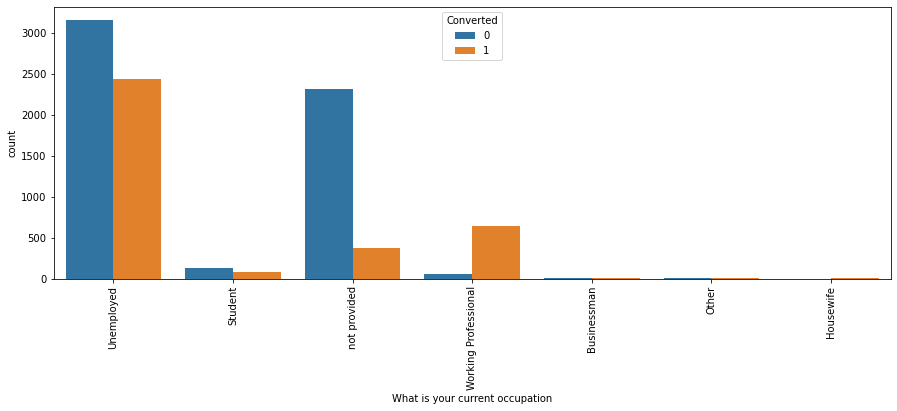

In [201]:
# Visualizing What is your current occupation variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'What is your current occupation', hue='Converted' , data =leads_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference:
Maximum leads generated are unemployed and their conversion rate is more than 50%.

Conversion rate of working professionals is very high.


#### What matters most to you in choosing a course

In [202]:
#checking value counts of 'What matters most to you in choosing a course'

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [203]:
### we can impute the null value with the mode that is Better Career Prospects
leads_df["What matters most to you in choosing a course"] =leads_df["What matters most to you in choosing a course"].fillna(leads_df["What matters most to you in choosing a course"].mode()[0])

In [204]:

leads_df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

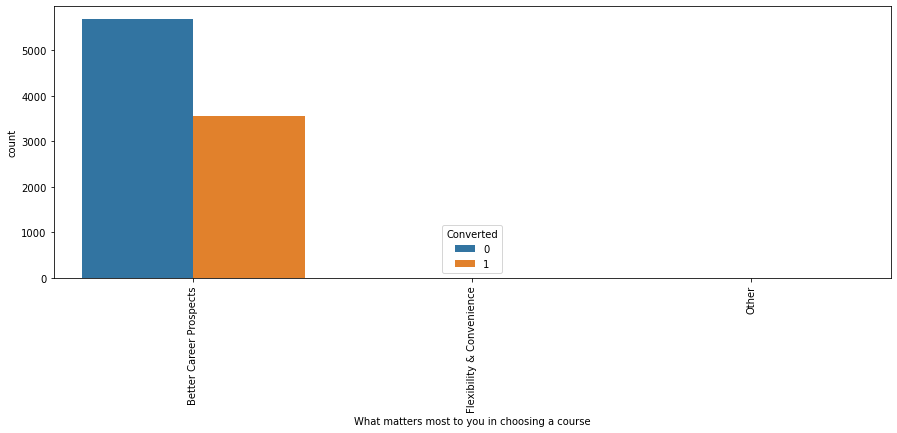

In [205]:
# Visualizing What is your current occupation variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'What matters most to you in choosing a course', hue='Converted' , data =leads_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference:
#####  What matters most to you in choosing a course is skwed on only one feature hence it can be dropped.

In [206]:
#creating a list of columns to be droppped

cols_to_drop.append('What matters most to you in choosing a course')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course']

### Last Activity

In [207]:
#checking value counts of Last Activity
leads_df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [208]:
### we can impute the null value with the mode that is email opened
leads_df["Last Activity"] =leads_df["Last Activity"].fillna(leads_df["Last Activity"].mode()[0])

In [209]:
#combining low frequency values
leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

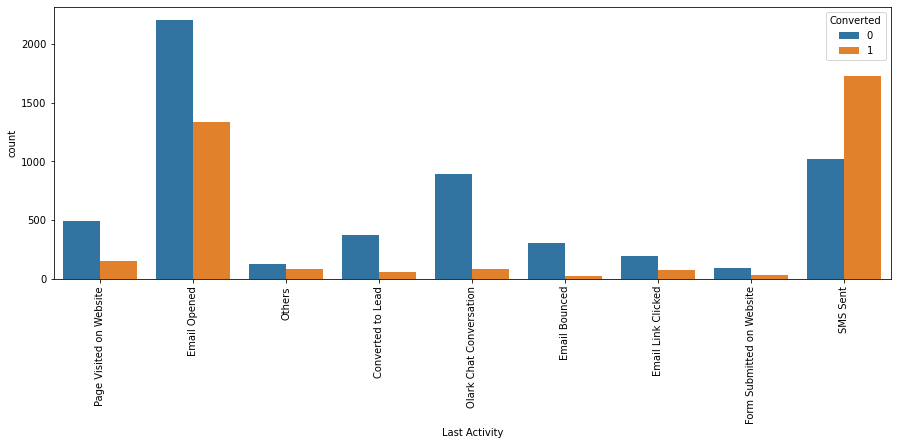

In [210]:
# Visualizing What is your current occupation variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Last Activity', hue='Converted' , data =leads_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference

Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

SMS sent as last acitivity has high conversion rate.

In [211]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity']

In [212]:
#checking value counts of Last Activity
leads_df['Last Notable Activity'].value_counts(dropna=False)

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [213]:
### we can impute the null value with the mode that is email opened
leads_df["Last Notable Activity"] =leads_df["Last Notable Activity"].fillna(leads_df["Last Notable Activity"].mode()[0])

In [214]:
#clubbing lower frequency values

leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

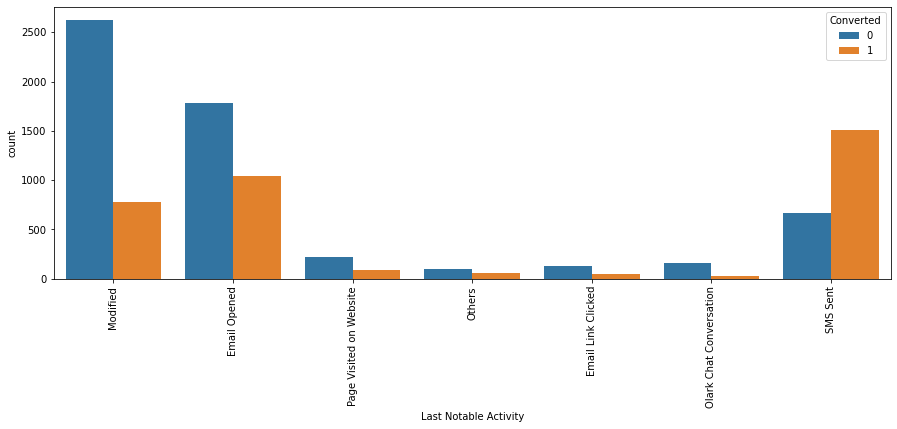

In [215]:
# Visualizing What is your current occupation variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Last Notable Activity', hue='Converted' , data =leads_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#### Inference
Maximum leads are generated having last activity as Email opened but conversion rate is not too good.

SMS sent as last acitivity has high conversion rate.

In [216]:
# Append 'Last Activity' to the cols_to_drop List it is a X-education's sales team generated data
cols_to_drop.append('Last Notable Activity')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity']

In [217]:
#Check the Null Values in All Columns after imputation:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     0.00
Country                                           0.00
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

#### Specialization

In [218]:
leads_df.Specialization.value_counts(dropna = False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [219]:
## we can replace select and nan with others
leads_df['Specialization'] = leads_df['Specialization'].replace([np.nan,'Select'], 'not provided')

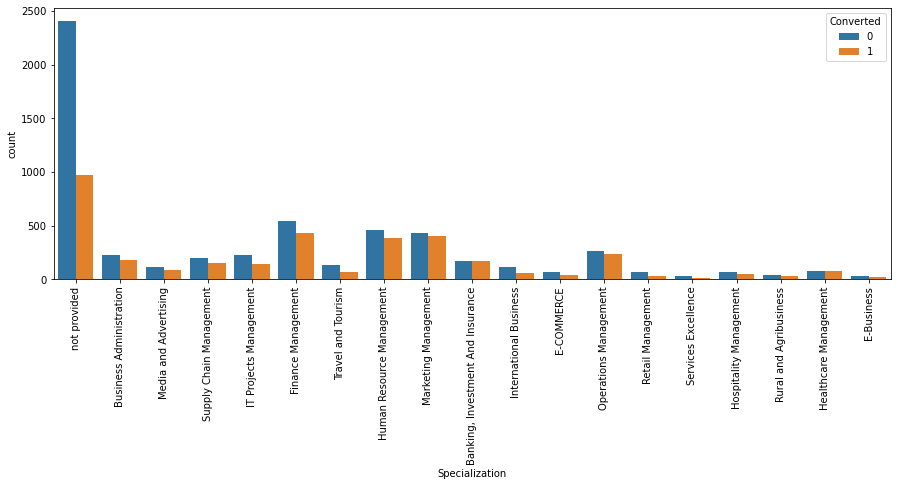

In [220]:
# Visualizing What is your current occupation variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Specialization', hue='Converted' , data =leads_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference
##### there is a good coversion rate of the leads from almost all specialisation except which are not provided
###### so this feature may be appended in the list of columns to drop

In [221]:
#creating a list of columns to be droppped

cols_to_drop.append('Specialization')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity',
 'Specialization']

### How did you hear about X Education

In [222]:
leads_df["How did you hear about X Education"].value_counts(dropna = False)

Select                   5043
NaN                      2207
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [223]:
## we can replace select and nan with others
leads_df['How did you hear about X Education'] = leads_df['How did you hear about X Education'].replace([np.nan,'Select'], 'Other')

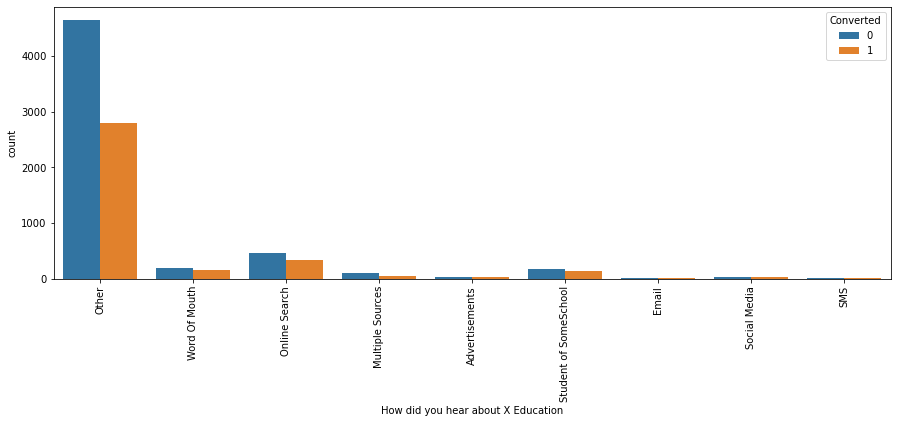

In [224]:
# Visualizing What is your current occupation variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'How did you hear about X Education', hue='Converted' , data =leads_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

### Inference:
The data is not giving a good inference as most of the data is missing or inthe option select, hence can be appended in the list of columns to drop

In [225]:
#creating a list of columns to be droppped

cols_to_drop.append('How did you hear about X Education')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity',
 'Specialization',
 'How did you hear about X Education']

In [226]:
leads_df["Lead Profile"].value_counts(dropna = False)

Select                         4146
NaN                            2709
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [227]:
## we can replace select and nan with others
leads_df['Lead Profile'] = leads_df['Lead Profile'].replace([np.nan,'Select'], 'Other')

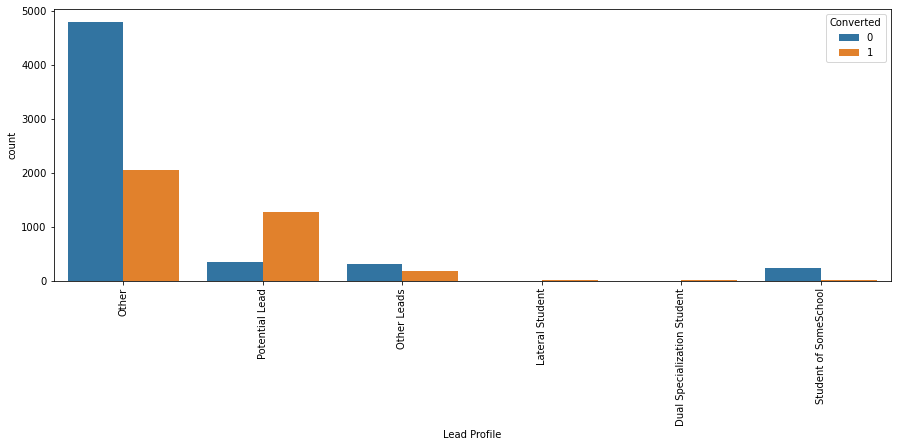

In [228]:
# Visualizing What is your current occupation variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'Lead Profile', hue='Converted' , data =leads_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

##### this feature also has the same problem as the above features like How did you hear about X Education, hence can be appended to the list of col to drop

In [229]:
#creating a list of columns to be droppped

cols_to_drop.append('Lead Profile')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile']

In [230]:
leads_df["City"].value_counts(dropna = False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [231]:
## we can replace select and nan with others
leads_df['City'] = leads_df['City'].replace([np.nan,'Select'], 'Other')

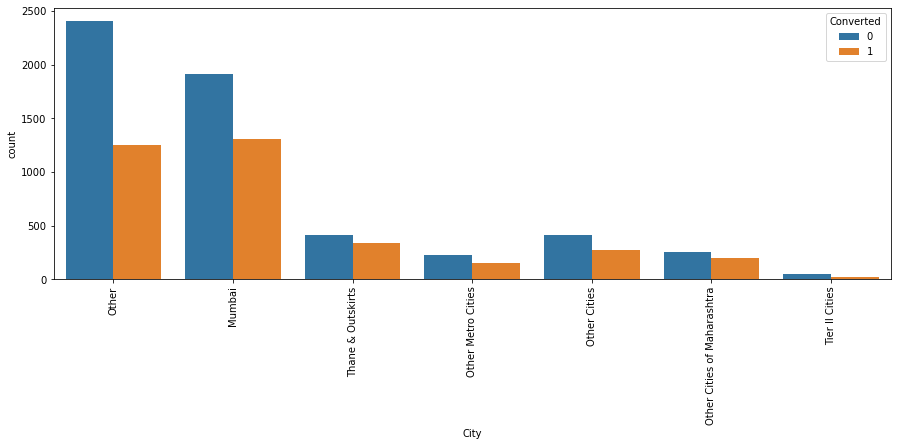

In [232]:
# Visualizing What is your current occupation variable after imputation
plt.figure(figsize=(15,5))
s1=sns.countplot(x= 'City', hue='Converted' , data =leads_df)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

###### this feature "city" may be dropped too as this also has the same problem like in Lead Profile

In [233]:
#creating a list of columns to be droppped

cols_to_drop.append('City')

#checking out list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [234]:
#Check the Null Values in All Columns after imputation:
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
How did you hear about X Education               0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                   

In [235]:
# Remaining missing values percentage is less than 2%, we can drop those rows without affecting the data
leads_df = leads_df.dropna()

In [236]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 

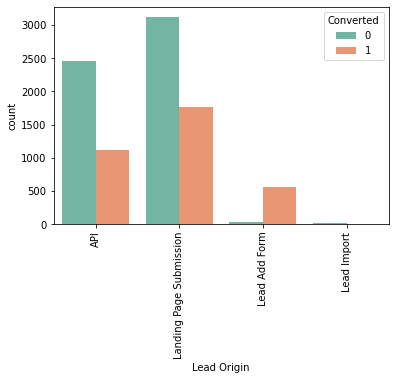

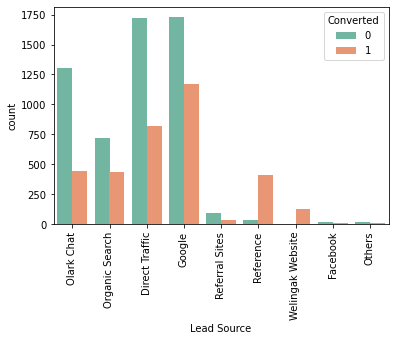

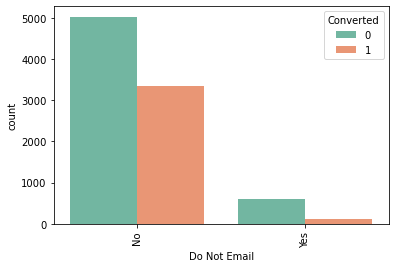

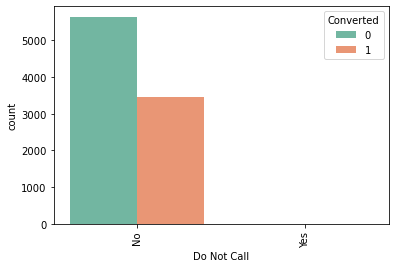

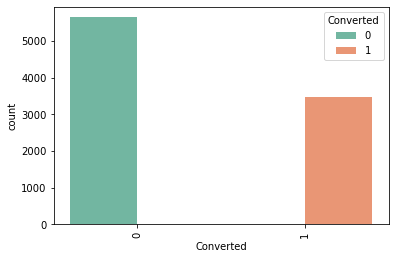

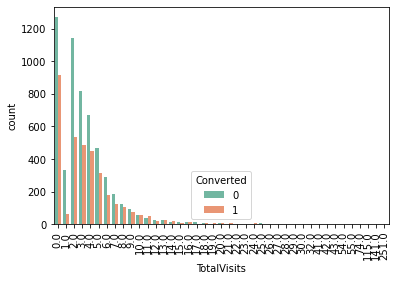

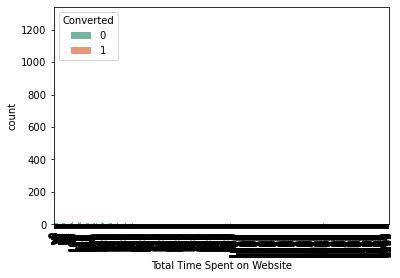

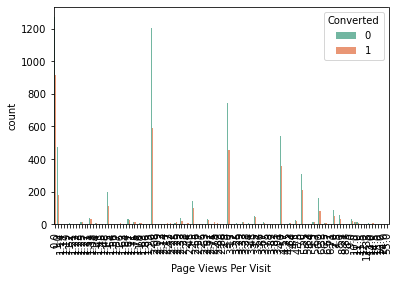

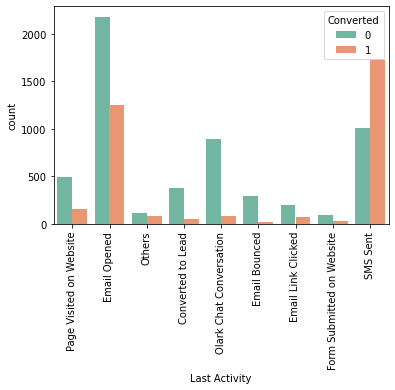

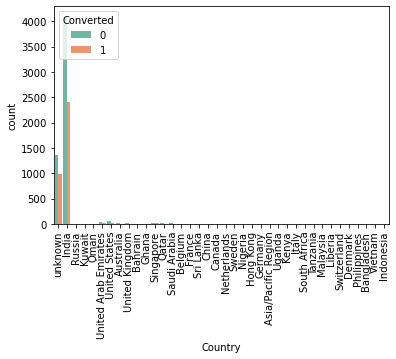

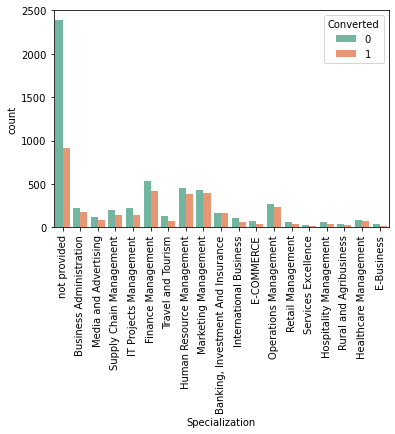

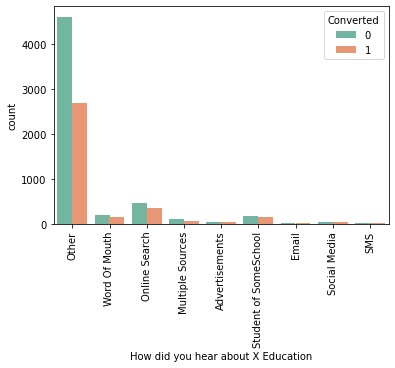

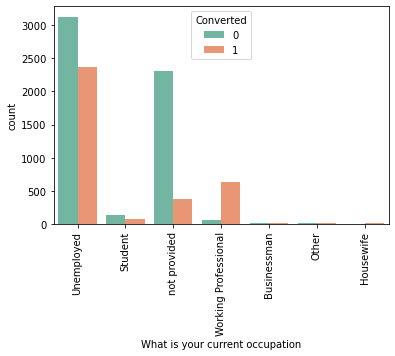

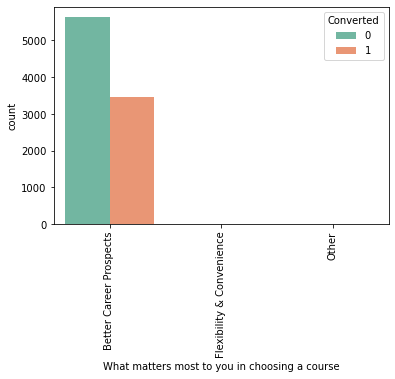

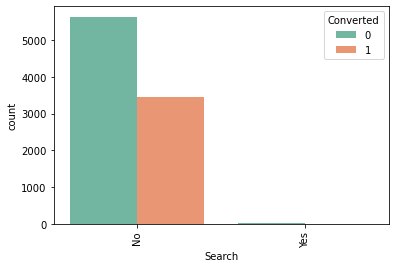

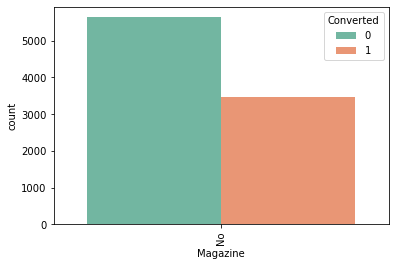

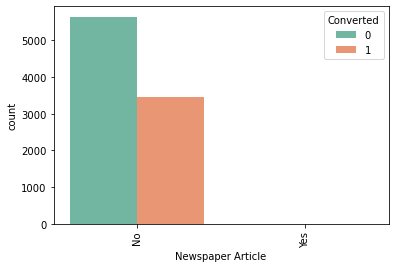

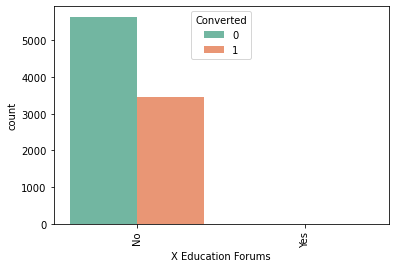

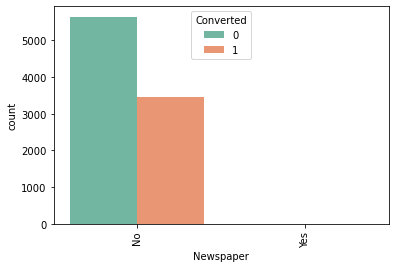

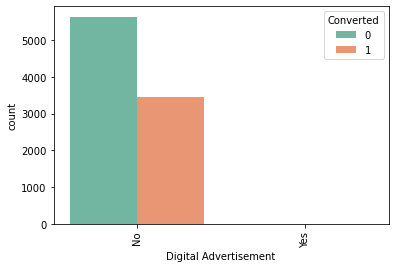

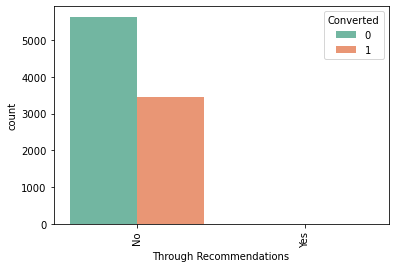

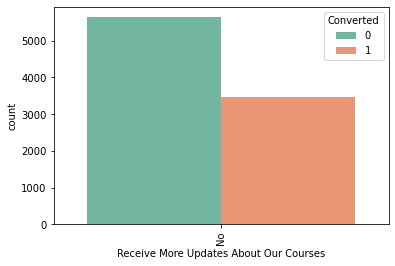

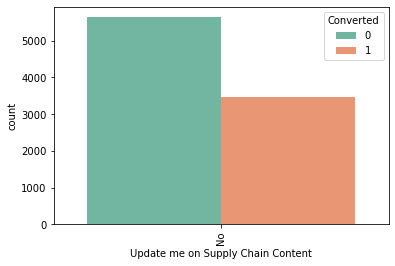

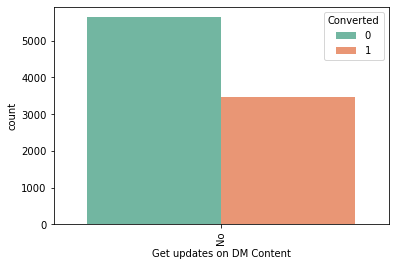

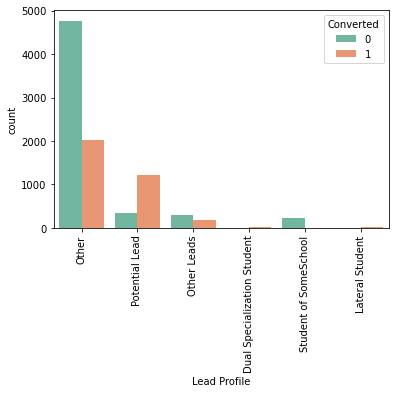

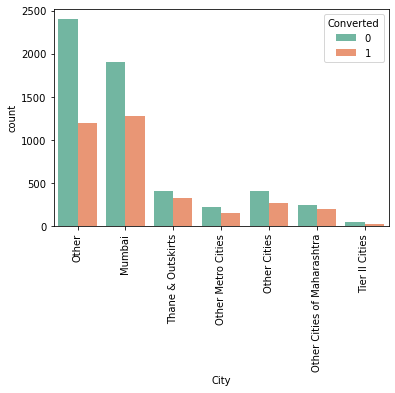

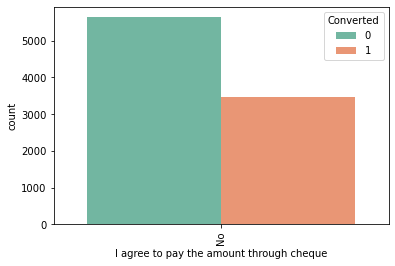

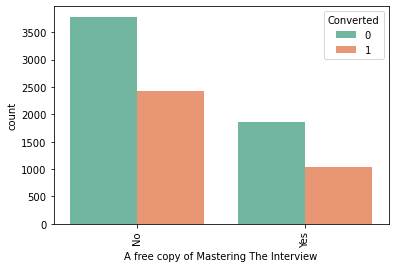

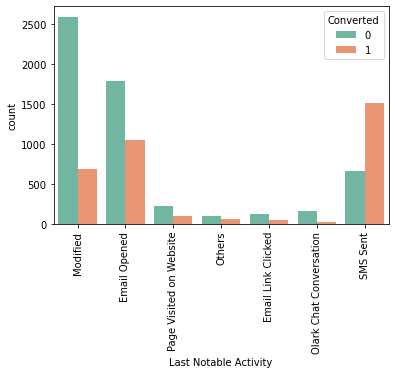

In [237]:
#### analysing all the feature with respect to the target variable to know how a variable is compared with the terget variable.
for col in leads_df:
    s1=sns.countplot(x=col, hue='Converted' , data = leads_df , palette = 'Set2')
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()

### We Can append the Do Not Call Column to the list of Columns to be Dropped data is higjly skewed

In [238]:
# Append 'Do Not Call' to the cols_to_drop List
cols_to_drop.append('Do Not Call')

#checking updated list for columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Do Not Call']

In [239]:
# checking final list of columns to be dropped
cols_to_drop

['Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Country',
 'What matters most to you in choosing a course',
 'Last Activity',
 'Last Notable Activity',
 'Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City',
 'Do Not Call']

In [240]:
#dropping columns
leads = leads_df.drop(cols_to_drop,axis = 1)



In [241]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Lead Origin                      9103 non-null   object 
 1   Lead Source                      9103 non-null   object 
 2   Do Not Email                     9103 non-null   object 
 3   Converted                        9103 non-null   int64  
 4   TotalVisits                      9103 non-null   float64
 5   Total Time Spent on Website      9103 non-null   int64  
 6   Page Views Per Visit             9103 non-null   float64
 7   What is your current occupation  9103 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 640.1+ KB


In [242]:
# Finding out conversion rate
Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

In [243]:
### currently the conversion rate is only 38%

# univariate analysis of numeric features


In [244]:
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000
mean,0.380204,3.445238,481.350104,2.362820
std,0.485464,4.854853,545.066142,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,9.000000,1.000000
50%,0.000000,3.000000,244.000000,2.000000
75%,1.000000,5.000000,919.500000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [245]:
numeric_col = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]

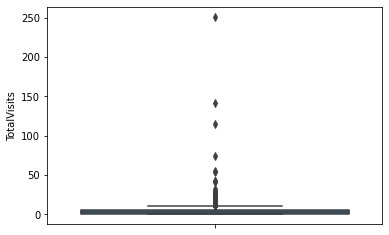

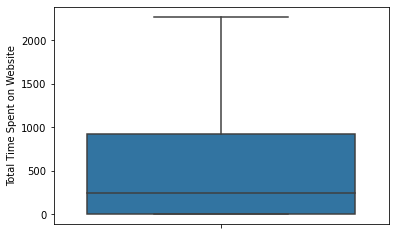

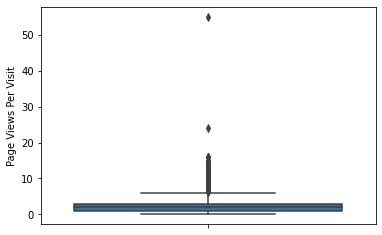

In [246]:
for col in numeric_col:
    sns.boxplot(y=leads[col])
    plt.show()

In [247]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

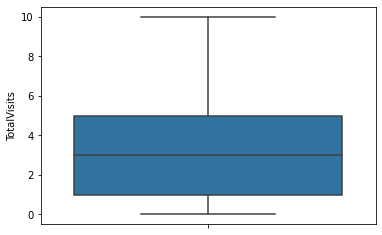

In [248]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['TotalVisits'])
plt.show()

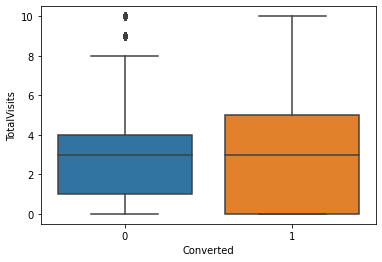

In [249]:
# Visualizing TotalVisits w.r.t Target Variable 'Converted'
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

### Inference
###### As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable TotalVisits

In [250]:
#### Presence of outliers can be clearly seen in the Page Views Per Visit, thus outlier treatment need to be done for this variable

In [251]:
#checking percentile values for "Page Views Per Visits"

leads['Page Views Per Visit'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

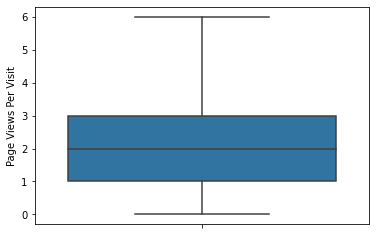

In [252]:
#Outlier Treatment: capping the outliers to 95% value for analysis

percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

#visualizing variable after outlier treatment
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

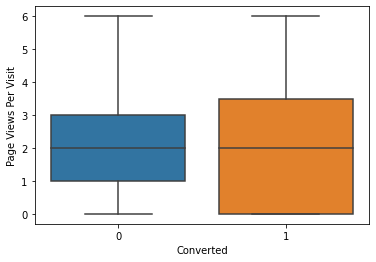

In [253]:
# Visualizing Page Views Per Visit w.r.t Target Variable 'Converted'
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads)
plt.show()

### Inference
###### As the median for both converted and non-converted leads are same , nothing coclusive can be said on the basis of variable Page Views Per Visit

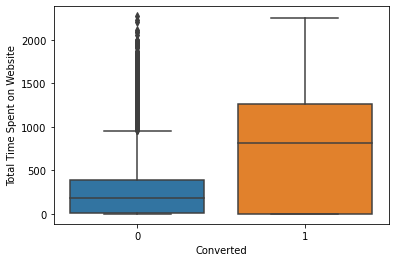

In [254]:
# Visualizing 'Total Time Spent on Website' w.r.t Target Variable 'converted'
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads)
plt.show()

### Inference
##### As can be seen, leads spending more time on website are more likely to convert , thus website should be made more enagaging to increase conversion rate

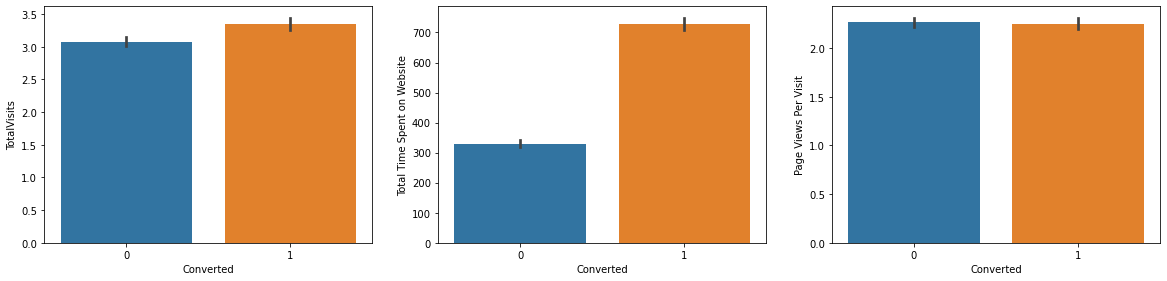

In [255]:
# Now check the conversions for all numeric values

plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(y = 'TotalVisits', x='Converted', data = leads)
plt.subplot(4,3,2)
sns.barplot(y = 'Total Time Spent on Website', x='Converted', data = leads)
plt.subplot(4,3,3)
sns.barplot(y = 'Page Views Per Visit', x='Converted', data = leads)
plt.show()

In [256]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unemployed
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Unemployed


## Step 4:  DATA PREPARATION FOR MODELLING

In [257]:
# List of variables to map

varlist =  ['Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
leads[varlist] = leads[varlist].apply(binary_map)

####  creation of dummy variables


In [258]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')

In [259]:
leads['Lead Source'].value_counts()

Google              2902
Direct Traffic      2543
Olark Chat          1753
Organic Search      1154
Reference            443
Welingak Website     129
Referral Sites       125
Facebook              31
Others                23
Name: Lead Source, dtype: int64

In [260]:
leads['What is your current occupation'].value_counts()

Unemployed              5502
not provided            2683
Working Professional     679
Student                  207
Other                     15
Housewife                  9
Businessman                8
Name: What is your current occupation, dtype: int64

In [261]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin']], drop_first=True)
leads = pd.concat([leads,dummy],1)



dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
leads = pd.concat([leads, dummy], axis = 1)


dummy = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy = dummy.drop(['What is your current occupation_not provided'], 1)
leads = pd.concat([leads, dummy], axis = 1)

In [262]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [263]:
#checking dataset after dummy variable creation
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1,2.0,1532,2.0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1.0,305,1.0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### STEP 5: train test split

In [264]:
#importing library for splitting dataset
from sklearn.model_selection import train_test_split

In [265]:
# Putting feature variable to X
X=leads.drop('Converted', axis=1)

#checking head of X
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [266]:
# Putting target variable to y
y = leads['Converted']

#checking head of y
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [267]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 6: Feature Scaling

In [268]:
#importing library for feature scaling
from sklearn.preprocessing import StandardScaler


In [269]:
#scaling of features
scaler = StandardScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
7962,-0.294015,-0.068258,1.476324,-0.423364,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5520,-0.294015,1.362470,-0.771066,2.083179,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1962,-0.294015,0.647106,-0.571257,0.133646,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1566,-0.294015,2.435517,1.393834,0.690655,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
9170,-0.294015,-1.141305,-0.881052,-1.258878,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [270]:
## Checking the conversion rate from 'converted' column as it denotes the target variable

(sum(y)/len(y.index))*100

38.02043282434362

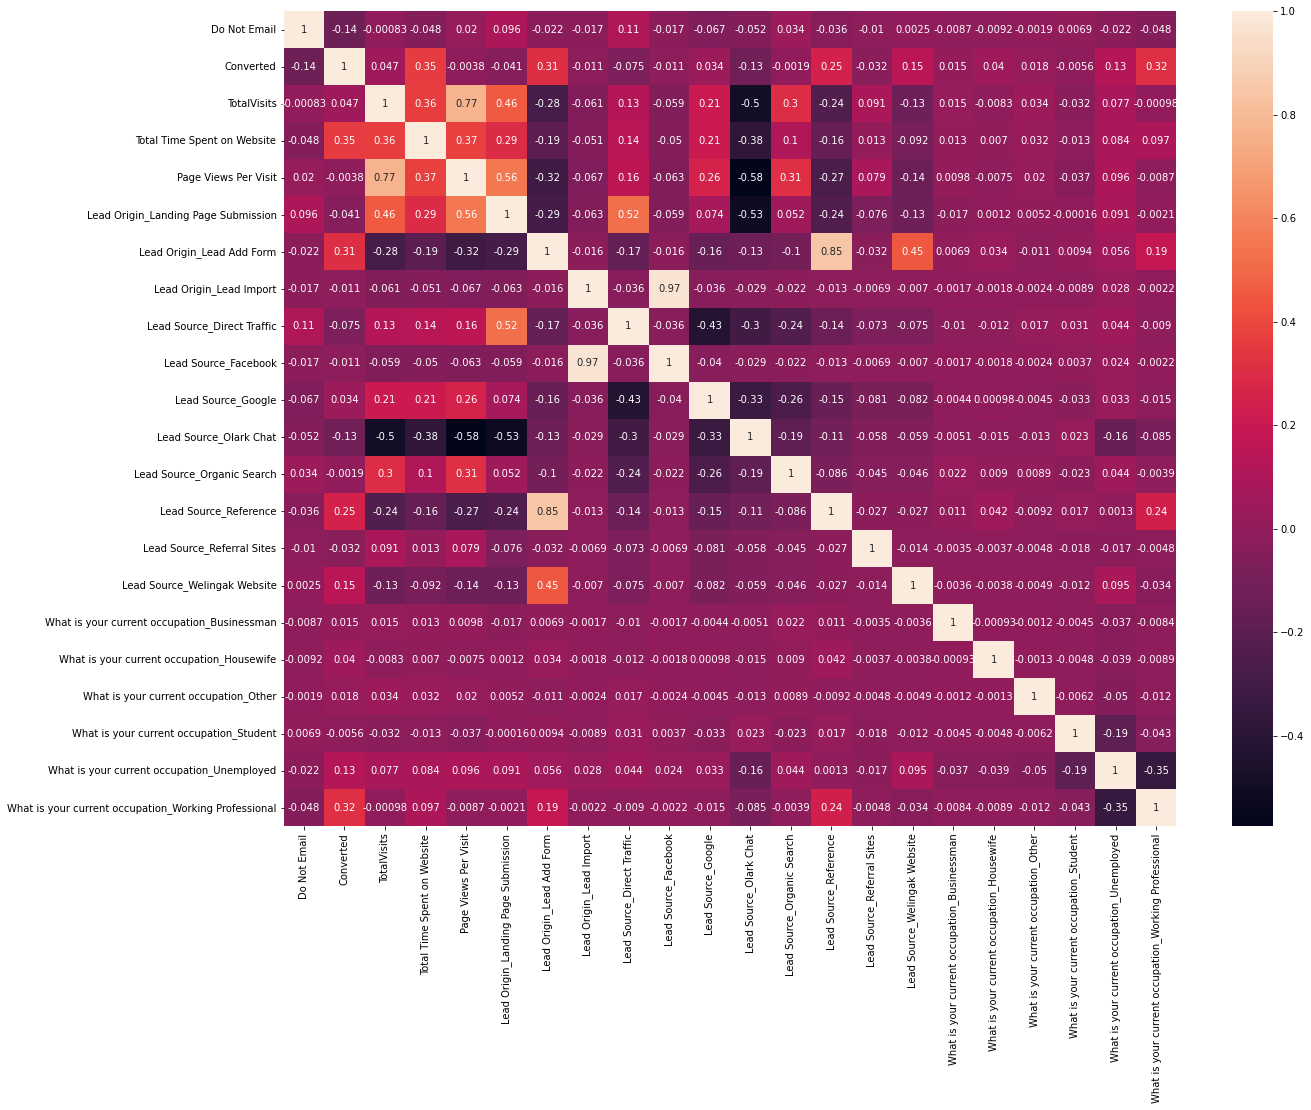

In [271]:
# Let's see the correlation matrix
plt.figure(figsize = (20,15))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [272]:
leads.shape

(9103, 22)

### Step 7: Model Building using Stats Model & RFE

In [273]:
# importing necessary library
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(estimator= logreg, n_features_to_select=12)             # running RFE with 12 variables as output
rfe = rfe.fit(X_train, y_train)

In [274]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 3),
 ('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 8),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Welingak Website', True, 1),
 ('What is your current occupation_Businessman', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1)]

In [276]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Facebook',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'What is your current occupation_Businessman',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional'],
      dtype='object')

In [277]:
len(col)

12

### MOdel Building

In [278]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2911.8
Date:                Thu, 23 Feb 2023   Deviance:                       5823.7
Time:                        22:37:57   Pearson chi2:                 6.35e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3389
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1406      0.080    -26.869      0.000      -2.297      -1.984
Total Time Spent on Website                              1.1124      0.038     29.128      0.000       1.038       1.187
Lead Origin_Lead Add Form                                3.8013      0.217     17.489      0.000       3.375       4.227
Lead Origin_Lead Import                                  0.8459      1.601      0.528      0.597      -2.291       3.983
Lead Source_Facebook                                     0.2173      1.600      0.136      0.892      -2.919       3.353
Lead Source_Olark Chat                                   0.9754      0.095     10.222      0.000       0.788       1.162
Lead Source_Welingak Website                             1.8241      0.745      2.450      0.014       0.365       3.284
What is your current occupation_Businessman              1.5696      1.007      1.559      0.119      -0.404       3.543
What is your current occupation_Housewife               24.0067    1.6e+04      0.002      0.999   -3.13e+04    3.13e+04
What is your current occupation_Other                    1.2850      0.651      1.973      0.048       0.009       2.561
What is your current occupation_Student                  1.1498      0.222      5.186      0.000       0.715       1.584
What is your current occupation_Unemployed               1.3125      0.083     15.802      0.000       1.150       1.475
What is your current occupation_Working Professional     3.8021      0.188     20.271      0.000       3.434       4.170
========================================================================================================================
"""

#### p-value of variable What is your current occupation_Housewife is high, so we can drop it.

In [279]:

#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

In [280]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.0
Date:                Thu, 23 Feb 2023   Deviance:                       5843.9
Time:                        22:38:19   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3368
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1129      0.079    -26.785      0.000      -2.267      -1.958
Total Time Spent on Website                              1.1122      0.038     29.174      0.000       1.037       1.187
Lead Origin_Lead Add Form                                3.8141      0.217     17.541      0.000       3.388       4.240
Lead Origin_Lead Import                                  0.8449      1.600      0.528      0.598      -2.292       3.982
Lead Source_Facebook                                     0.2157      1.600      0.135      0.893      -2.920       3.351
Lead Source_Olark Chat                                   0.9654      0.095     10.137      0.000       0.779       1.152
Lead Source_Welingak Website                             1.8098      0.745      2.430      0.015       0.350       3.269
What is your current occupation_Businessman              1.5430      1.008      1.531      0.126      -0.432       3.518
What is your current occupation_Other                    1.2582      0.651      1.932      0.053      -0.018       2.534
What is your current occupation_Student                  1.1242      0.222      5.074      0.000       0.690       1.558
What is your current occupation_Unemployed               1.2861      0.082     15.612      0.000       1.125       1.448
What is your current occupation_Working Professional     3.7752      0.187     20.163      0.000       3.408       4.142
========================================================================================================================
"""

#### p-value of variable Lead Source_Facebookr is high, so we can drop it.


In [281]:
#dropping column with high p-value

col = col.drop('Lead Source_Facebook',1)

In [282]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6361
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2922.0
Date:                Thu, 23 Feb 2023   Deviance:                       5843.9
Time:                        22:38:44   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3368
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1128      0.079    -26.784      0.000      -2.267      -1.958
Total Time Spent on Website                              1.1122      0.038     29.174      0.000       1.037       1.187
Lead Origin_Lead Add Form                                3.8139      0.217     17.540      0.000       3.388       4.240
Lead Origin_Lead Import                                  1.0519      0.441      2.387      0.017       0.188       1.915
Lead Source_Olark Chat                                   0.9653      0.095     10.136      0.000       0.779       1.152
Lead Source_Welingak Website                             1.8098      0.745      2.430      0.015       0.350       3.269
What is your current occupation_Businessman              1.5430      1.008      1.531      0.126      -0.432       3.518
What is your current occupation_Other                    1.2582      0.651      1.932      0.053      -0.018       2.534
What is your current occupation_Student                  1.1260      0.221      5.091      0.000       0.693       1.559
What is your current occupation_Unemployed               1.2860      0.082     15.612      0.000       1.125       1.447
What is your current occupation_Working Professional     3.7753      0.187     20.163      0.000       3.408       4.142
========================================================================================================================
"""

#### p-value of variable What is your current occupation_Businessman is high, so we can drop it.

In [283]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Businessman',1)

In [284]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6362
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2923.1
Date:                Thu, 23 Feb 2023   Deviance:                       5846.1
Time:                        22:39:05   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3365
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.1055      0.079    -26.788      0.000      -2.260      -1.951
Total Time Spent on Website                              1.1120      0.038     29.182      0.000       1.037       1.187
Lead Origin_Lead Add Form                                3.8239      0.218     17.575      0.000       3.397       4.250
Lead Origin_Lead Import                                  1.0516      0.441      2.387      0.017       0.188       1.915
Lead Source_Olark Chat                                   0.9643      0.095     10.128      0.000       0.778       1.151
Lead Source_Welingak Website                             1.7998      0.745      2.417      0.016       0.340       3.259
What is your current occupation_Other                    1.2511      0.651      1.922      0.055      -0.025       2.527
What is your current occupation_Student                  1.1185      0.221      5.059      0.000       0.685       1.552
What is your current occupation_Unemployed               1.2787      0.082     15.574      0.000       1.118       1.440
What is your current occupation_Working Professional     3.7678      0.187     20.136      0.000       3.401       4.135
========================================================================================================================
"""

#### p-value of variable What is your current occupation_Other is high, so we can drop it.

In [285]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Other',1)

In [286]:
#BUILDING MODEL #5

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6363
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2924.9
Date:                Thu, 23 Feb 2023   Deviance:                       5849.7
Time:                        22:39:20   Pearson chi2:                 6.39e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3362
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0910      0.078    -26.809      0.000      -2.244      -1.938
Total Time Spent on Website                              1.1138      0.038     29.232      0.000       1.039       1.189
Lead Origin_Lead Add Form                                3.8250      0.218     17.581      0.000       3.399       4.251
Lead Origin_Lead Import                                  1.0525      0.441      2.389      0.017       0.189       1.916
Lead Source_Olark Chat                                   0.9620      0.095     10.107      0.000       0.775       1.148
Lead Source_Welingak Website                             1.8002      0.745      2.417      0.016       0.341       3.260
What is your current occupation_Student                  1.1047      0.221      4.999      0.000       0.672       1.538
What is your current occupation_Unemployed               1.2643      0.082     15.502      0.000       1.104       1.424
What is your current occupation_Working Professional     3.7538      0.187     20.085      0.000       3.387       4.120
========================================================================================================================
"""

##### Since the Model 5 seems to be stable with significant p-values, we shall go ahead with this model for further analysis

In [287]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.56
4,Lead Source_Welingak Website,1.32
3,Lead Source_Olark Chat,1.30
0,Total Time Spent on Website,1.28
6,What is your current occupation_Unemployed,1.22
7,What is your current occupation_Working Profes...,1.12
2,Lead Origin_Lead Import,1.01
5,What is your current occupation_Student,1.01


#### All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

### predicting a trained model

In [288]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.693726
5520    0.156355
1962    0.188001
1566    0.961403
9170    0.300239
5097    0.108088
8954    0.265427
309     0.219064
5519    0.108088
1050    0.602375
dtype: float64

In [289]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.69372597, 0.15635469, 0.18800084, 0.96140336, 0.30023911,
       0.10808795, 0.26542721, 0.21906437, 0.10808795, 0.60237466])

In [290]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.693726,7962
1,0,0.156355,5520
2,0,0.188001,1962
3,1,0.961403,1566
4,0,0.300239,9170


In [291]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.693726,7962,1
1,0,0.156355,5520,0
2,0,0.188001,1962,0
3,1,0.961403,1566,1
4,0,0.300239,9170,0


In [292]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3523  430]
 [ 876 1543]]


In [293]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7950408035153798


In [294]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [295]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6378668871434477

In [296]:
# Let us calculate specificity
TN / float(TN+FP)

0.8912218568176069

In [297]:
# Calculate False Postive Rate - predicting conversion when lead does not have convert
print(FP/ float(TN+FP))

0.10877814318239312


In [298]:
# positive predictive value 
print (TP / float(TP+FP))

0.7820577800304105


In [299]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8008638326892475


## ROC CURVE

### An ROC curve demonstrates several things:

#### It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
##### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
###### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [300]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [301]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

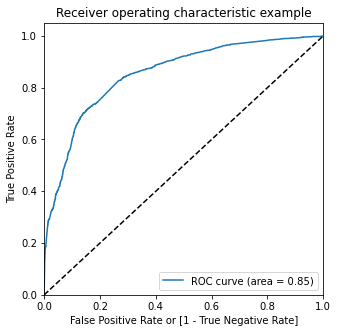

In [302]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#### The ROC Curve should be a value close to 1. We are getting a good value of 0.85 indicating a good predictive model.

### OPTIMAL CUTOFF POINT

In [303]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.693726,7962,1,1,1,1,1,1,1,1,0,0,0
1,0,0.156355,5520,0,1,1,0,0,0,0,0,0,0,0
2,0,0.188001,1962,0,1,1,0,0,0,0,0,0,0,0
3,1,0.961403,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.300239,9170,0,1,1,1,1,0,0,0,0,0,0


In [304]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.491055  0.984704  0.188970
0.2   0.2  0.690521  0.901612  0.561346
0.3   0.3  0.769303  0.826375  0.734379
0.4   0.4  0.799435  0.693262  0.864407
0.5   0.5  0.795041  0.637867  0.891222
0.6   0.6  0.775110  0.551881  0.911713
0.7   0.7  0.752354  0.451426  0.936504
0.8   0.8  0.728186  0.338983  0.966355
0.9   0.9  0.687853  0.186441  0.994688


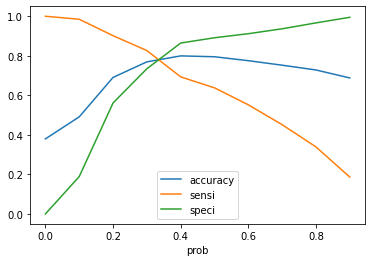

In [305]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [306]:
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.693726,7962,1,1,1,1,1,1,1,1,0,0,0,1
1,0,0.156355,5520,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.188001,1962,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.961403,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.300239,9170,0,1,1,1,1,0,0,0,0,0,0,1


In [307]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.693726,7962,1,69
1,0,0.156355,5520,0,16
2,0,0.188001,1962,0,19
3,1,0.961403,1566,1,96
4,0,0.300239,9170,1,30


In [308]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_df['final_Predicted'].value_counts()

1    1999
0     420
Name: final_Predicted, dtype: int64

In [309]:
# check the precentage of final_predicted conversions

1999/float(1999+420)

0.82637453493179

##### Hence, we can see that the final prediction of conversions have a target of 83% conversion as per the X Educations CEO's requirement . Hence, we can say that this is a good model.

#### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on train set

In [310]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.7693032015065914

In [311]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2903, 1050],
       [ 420, 1999]], dtype=int64)

In [312]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [313]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.82637453493179

In [314]:
# Let us calculate specificity
TN / float(TN+FP)

0.7343789526941563

### Inference:
##### So as we can see above the model seems to be performing well. The ROC curve has a value of 0.86, which is very good. We have the following values for the Train Data:

Accuracy : 76.93%
Sensitivity :82.63%
Specificity : 73.43%
###### Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [315]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.2656210473058437


In [316]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6556247950147589


In [317]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8736081853746615


#### Pecision and recall

In [318]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2903, 1050],
       [ 420, 1999]], dtype=int64)

In [319]:
from sklearn.metrics import precision_score, recall_score

In [320]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6556247950147589

In [321]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.82637453493179

#### Precision and recall trade off

In [322]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [323]:
# Creating precision recall curve
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

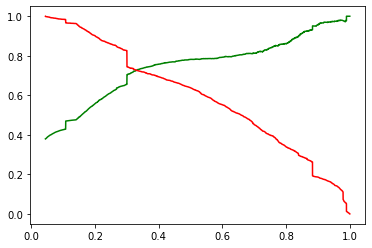

In [324]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### PREDICTION ON TEST SET

In [325]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.294015,-0.068258,-0.103815,0.412150,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4050,-0.294015,-1.141305,-0.881052,-1.258878,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
7201,3.401183,-0.425940,0.424120,-0.144859,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1196,-0.294015,0.289424,-0.105648,0.969160,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
8219,-0.294015,1.362470,-0.428274,-0.284112,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [326]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,-0.103815,0,0,0,0,0,1,0
4050,-0.881052,1,0,0,0,0,1,0
7201,0.424120,0,0,0,0,0,1,0
1196,-0.105648,0,0,0,0,0,1,0
8219,-0.428274,0,0,0,0,0,1,0


In [327]:
X_test_sm = sm.add_constant(X_test)

In [328]:
y_test_pred = res.predict(X_test_sm)  

In [329]:
    
y_test_pred[:10]

3504    0.280415
4050    0.882561
7201    0.412322
1196    0.280003
8219    0.213527
8747    0.108088
9048    0.614921
6524    0.188938
7693    0.181240
8187    0.882561
dtype: float64

In [330]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.280415
4050,0.882561
7201,0.412322
1196,0.280003
8219,0.213527


In [331]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [332]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [333]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [334]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.280415
1,1,4050,0.882561
2,0,7201,0.412322
3,0,1196,0.280003
4,1,8219,0.213527


In [335]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [336]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.280415
1,1,4050,0.882561
2,0,7201,0.412322
3,0,1196,0.280003
4,1,8219,0.213527


In [337]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.280415,28
1,4050,1,0.882561,88
2,7201,0,0.412322,41
3,1196,0,0.280003,28
4,8219,1,0.213527,21


In [338]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [339]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
checking_test_df['final_Predicted'].value_counts()

1    864
0    178
Name: final_Predicted, dtype: int64

In [341]:
# check the precentage of final_predicted conversions on test data

865/float(864+178)

0.8301343570057581

##### Overall Metrics - Accuracy, Confusion Metrics, Sensitivity, Specificity, False Postive Rate, Positive Predictive Value, Negative Predicitive Value on final prediction on test set

In [342]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7795679238374222

In [343]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1265,  424],
       [ 178,  864]], dtype=int64)

In [344]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [345]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8291746641074856

In [346]:
# Let us calculate specificity
TN / float(TN+FP)

0.7489638839550029

In [347]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6708074534161491

In [348]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8291746641074856

#### Inference:
##### After running the model on the Test Data these are the figures we obtain:

Accuracy : 78%
Sensitivity :83%
Specificity :75%

### Conclusion:

##### While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the optimal cut off based on Sensitivity and Specificity for calculating the final prediction.
##### Accuracy, Sensitivity and Specificity values of test set are around 78%, 83% and 75% which are approximately closer to the respective values calculated using trained set.
##### Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is around 80%
### Hence overall this model seems to be good.

### Important features responsible for good conversion rate or the ones' which contributes more towards the probability of a lead getting converted are :
 Lead Origin_Lead Add Form
 
 What is your current occupation_Working Professional
 
 Total Time Spent on Website